<a href="https://colab.research.google.com/github/AthaG/Tensorflow_Basics/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [6]:
print(tf.__version__)

2.4.1


In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
type(train_images)

numpy.ndarray

In [11]:
len(train_labels)


60000

In [12]:
train_images[0, 20, 20]

218

In [13]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [14]:
test_images.shape

(10000, 28, 28)

In [15]:
len(test_labels)


10000

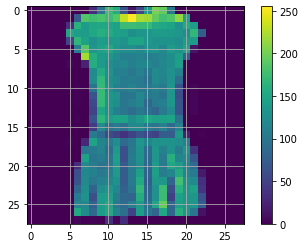

In [17]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(True)
plt.show()

In [18]:
train_images = train_images / 255.0

test_images = test_images / 255.0

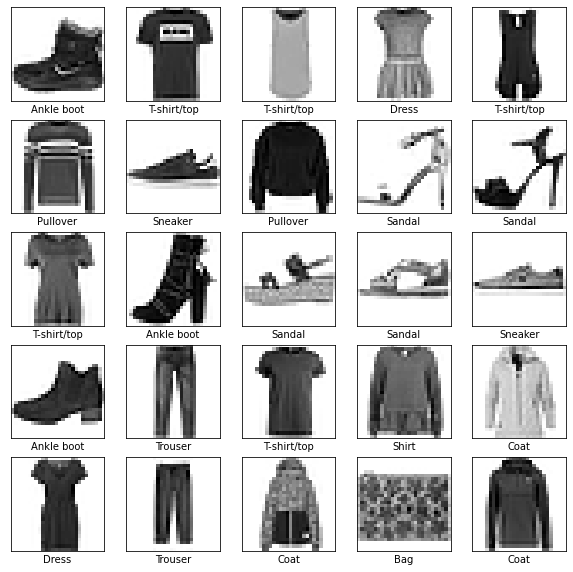

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [22]:
model.fit(train_images, train_labels, epochs=7)


Epoch 1/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6347 - accuracy: 0.7810
Epoch 2/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3871 - accuracy: 0.8608
Epoch 3/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3453 - accuracy: 0.8737
Epoch 4/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3164 - accuracy: 0.8834
Epoch 5/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2937 - accuracy: 0.8911
Epoch 6/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2802 - accuracy: 0.8964
Epoch 7/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2632 - accuracy: 0.9028


In [23]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3501 - accuracy: 0.8762

Test accuracy: 0.8762000203132629


In [24]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [32]:
predictions = probability_model.predict(test_images)


In [33]:
predictions[0]

array([2.6253144e-07, 5.7286988e-09, 6.3806671e-09, 3.9478985e-09,
       2.2254794e-08, 1.2434612e-03, 1.0154444e-06, 9.3844319e-03,
       8.2137097e-07, 9.8936999e-01], dtype=float32)

In [27]:
np.argmax(predictions[0])

9

In [35]:
class_names[test_labels[0]]

'Ankle boot'

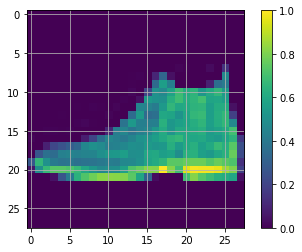

In [34]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

In [36]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

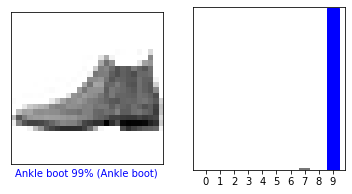

In [37]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

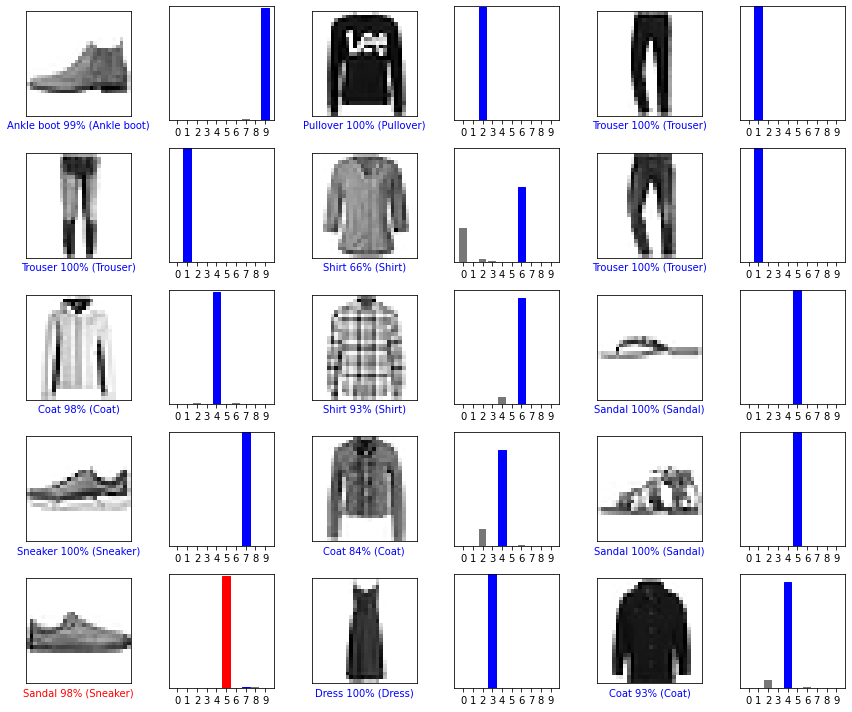

In [38]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [72]:
# Grab an image from the test dataset.
img = test_images[10]

print(img.shape)

(28, 28)


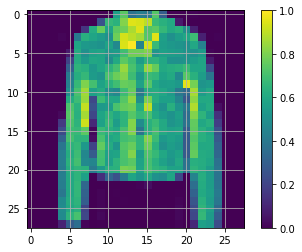

In [73]:
plt.figure()
plt.imshow(test_images[10])
plt.colorbar()
plt.grid(True)
plt.show()

In [74]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [75]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.00890245e-05 1.98826257e-07 1.44587412e-01 7.38582685e-07
  8.44752669e-01 3.34275796e-07 1.06192175e-02 3.38214683e-08
  1.91711842e-05 1.18080727e-07]]


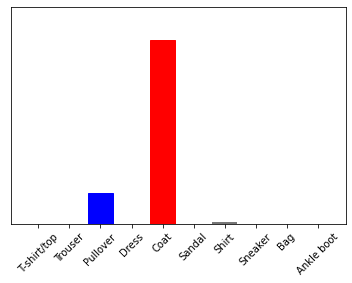

In [76]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [77]:
np.argmax(predictions_single[0])

4

In [78]:
class_names[test_labels[10]]

'Coat'